# Plots

## Import dependencies and data

In [1]:
# import dependencies
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# define relevant paths
home_path = os.path.dirname(os.getcwd())
data_path = home_path + '\\data\\'
plot_path = home_path + '\\plotting\\plots\\'

In [6]:
# define HYPERPARAMS
plot_unit   = '1 day'
plot_suffix = '1d'
plot_nsteps = 2880 # 2 steps per minute

# set seaborn style/theme
sns.set_theme()
sns.set_style('white')

In [4]:
# get merged data
data = pd.read_csv(
    data_path + 'data_merged.csv',
    header=[0, 1],
    index_col=[0, 1, 2, 3]
)

# convert index.date col to datetime
#data.index = pd.to_datetime(data.index.values)
data.index = data.index.set_levels(
    levels=pd.to_datetime(data.index.get_level_values(3).values),
    level=3
)

# drop all index levels except date
data = data.droplevel(
    level=[0, 1, 2], 
    axis=0
)

## Get all columns in Df

In [5]:
# find and print all available sensors for different data categories
cols = data.columns.get_level_values(0).unique()
for col in cols:
    subcols = data[col].columns
    
    print(col.upper())
    #print('\n')
    for subcol in subcols:
        print('\t\t{}'.format(subcol)) 
    #print('\n\n')
    print('\n')

FLOW
		DC_SP103_absolute
		DC_SP103_relative
		DC_SP104_absolute
		DC_SP104_relative
		DC_SP105_absolute
		DC_SP105_relative
		DC_SP106_absolute
		DC_SP106_relative
		DC_SP107_absolute
		DC_SP107_relative
		DC_SP108_absolute
		DC_SP108_relative
		DC_SP110_absolute
		DC_SP110_relative
		DC_SP111_absolute
		DC_SP111_relative
		DC_SP112_absolute
		DC_SP112_relative
		DC_SP113_absolute
		DC_SP113_relative
		FF01_GP101_actual
		FF01_GP101_default
		FF02_GP101_actual
		FF02_GP101_default
		TA01_GP101_default
		TA01_SP101_absolute
		TA01_SP101_relative
		TA01_SP102_absolute
		TA01_SP102_relative
		TA02_GP101_default
		TA02_SP109_absolute
		TA02_SP109_relative


HUMIDITY
		DC_GT101_GM101
		DC_GT102_GM102
		DC_GT103_GM103
		DC_GT104_GM104
		DC_GT401_GM401
		TA01_GT10X_GM10X
		TA01_GT401_GM401
		TA02_GT401_GM401
		SMHI


PRESSURE
		DC_GP101
		FF01_GP101
		FF02_GP101
		TA01_GP101
		TA01_GP102
		TA01_GP103
		TA01_GP401
		TA02_GP101
		TA02_GP401
		SMHI


SETPOINTS
		TA01_SP101_calculated
		TA01_SP1

## Define plot specs

In [37]:
plot_cats = [
    # EXAMPLE: ('title', 'type', 'filter (RegEx)', 'units', 'palette', 'alpha', 'filename'),
    {
        'title':'Humidity measurements (from DC), {}'.format(plot_unit),
        'type':'humidity',
        'filter':'DC_GT401_GM401',
        'units':'%', 
        'palette':'mako',
        'alpha':0.5,
        'linewidth':2.0,
        'save':True,
        'fname':'humid_dc_{}.png'.format(plot_suffix),
    },{
        'title':'Pressure - I/O, {}'.format(plot_unit),
        'type':'pressure',
        'filter':'TA01_GP101|FF01_GP101',
        'units':'Pa', 
        'palette':'viridis_r',
        'alpha':1.0,
        'linewidth':1.5,
        'save':False,
        'fname':'pa_ff01_{}.png'.format(plot_suffix),
    },
    {
        'title':'Pressure - GH diff, {}'.format(plot_unit),
        'type':'pressure',
        'filter':'DC_GP101',
        'units':'Pa', 
        'palette':'viridis_r',
        'alpha':1.0,
        'linewidth':1.5,
        'save':False,
        'fname':'pa_ff01_{}.png'.format(plot_suffix),
    },
    {
        'title':'Pressure - TA01, {}'.format(plot_unit),
        'type':'pressure',
        'filter':'TA01_GP401',
        'units':'Pa', 
        'palette':'viridis_r',
        'alpha':1.0,
        'linewidth':1.5,
        'save':False,
        'fname':'pa_ta01_{}.png'.format(plot_suffix),
    },
    {
        'title':'Pressure - SMHI, {}'.format(plot_unit),
        'type':'pressure',
        'filter':'SMHI',
        'units':'hPa', 
        'palette':'viridis_r',
        'alpha':1.0,
        'linewidth':1.5,
        'save':False,
        'fname':'pa_smhi_{}.png'.format(plot_suffix),
    },
    {
        'title':'Flow - I/O, {}'.format(plot_unit),
        'type':'flow',
        'filter':'TA01_GP101_default|FF01_GP101_default',
        'units':'hPa', 
        'palette':'viridis_r',
        'alpha':1.0,
        'linewidth':1.5,
        'save':False,
        'fname':'pa_smhi_{}.png'.format(plot_suffix),
    },{
        'title':'Temp - GH/DC, {}'.format(plot_unit),
        'type':'temperatures',
        'filter':'DC_GT401_GM401|TA01_GT10X_GM10X',
        'units':'hPa', 
        'palette':'Oranges',
        'alpha':1.0,
        'linewidth':1.5,
        'save':False,
        'fname':'pa_smhi_{}.png'.format(plot_suffix),
    },
]

## Create and save figures

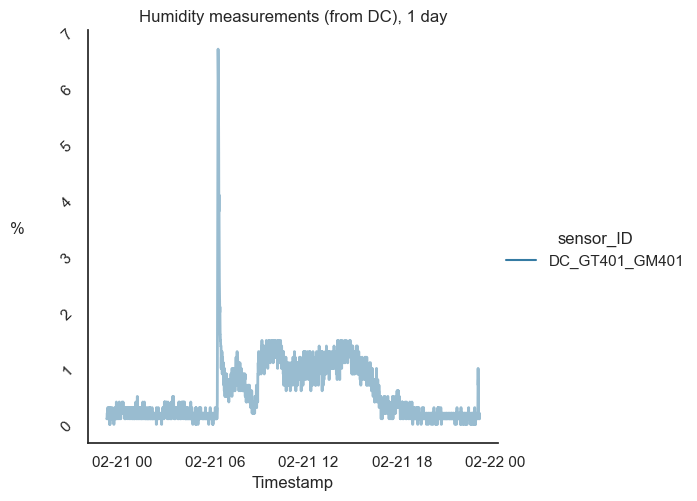

In [38]:
# crop data
data_cropped = data.iloc[-plot_nsteps:]

# iterate over plot params and save figs
for params in plot_cats[:1]:
    
    if type(params['type']) == list:
        subset = data_cropped.filter(regex=params['filter'], axis=1).droplevel(level=1, axis=1)
        subset = subset[params['type']]
    else:
        subset = data_cropped[params['type']].filter(regex=params['filter'])
    ax = sns.relplot(
        data=subset,
        kind='line',
        palette= params['palette'],
        alpha= params['alpha'],
        linewidth=params['linewidth'],
        dashes=False,
        markers=False,
        legend='full',
    )

    ax.set_xticklabels(step=2)
    
    plt.yticks(rotation=45)
    plt.xlabel('Timestamp')
    plt.ylabel(params['units'], loc='center', rotation=0, fontsize=12, labelpad=30)
    plt.title(params['title'])
    
    if params['save']:
        fpath = plot_path + params['fname']
        plt.savefig(fpath, bbox_inches='tight', dpi=200)
    
    plt.show()